In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

np.random.seed(42)

In [10]:
@njit
def ou(T):
    x = np.zeros(T)
    x[0] = 0.1
    for t in range(1,T):
        noise = np.random.normal(0, np.sqrt(2))
        x[t] = x[t-1] - gamma*x[t-1]*dt + dt*noise

    return x

In [11]:
T_tot = 10**5
dt = 0.1
T = int(T_tot/dt)
gamma = 0.1

x = ou(T)

In [12]:
@njit
def bootstrap(x,N):
    X = np.zeros((N,T))
    
    for i in range(N):
        for t in range(T):
            idx = np.random.randint(0,T)
            X[i,t] = x[idx]
    
    return X            

In [13]:
N = 100
X = bootstrap(x,N)

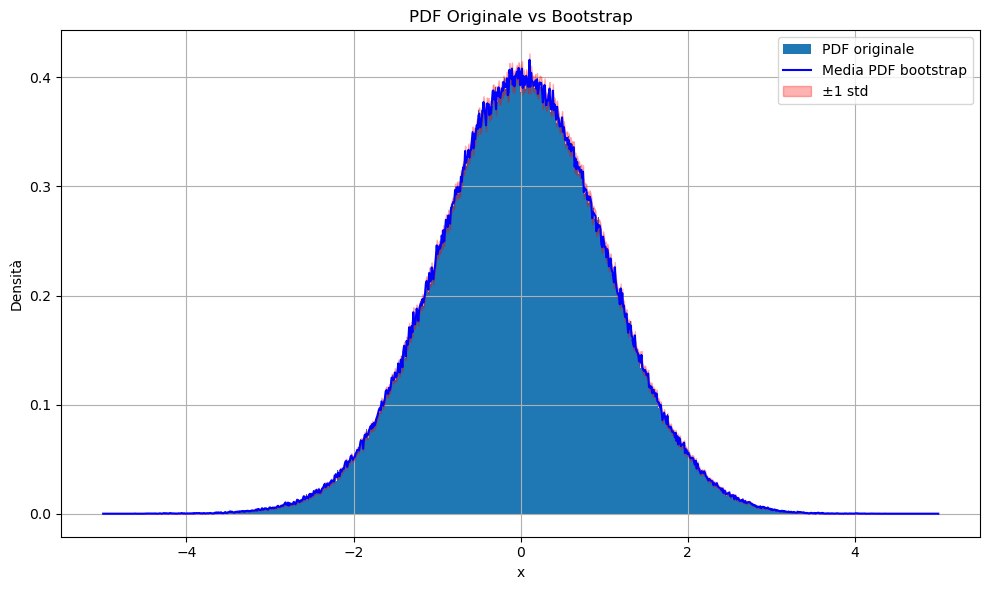

In [14]:
nbin = 1000
pdf_orig, bin_edges = np.histogram(x, bins=nbin, range=(-5,5), density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])*0.5

pdfs = np.zeros((N, nbin))
for i in range(N):
    pdfs[i], _ = np.histogram(X[i], bins=nbin, range=(-5,5), density=True)

pdf_mean = np.mean(pdfs, axis=0)
pdf_std = np.std(pdfs, axis=0)

plt.figure(figsize=(10,6))
plt.hist(x, bins=nbin, label='PDF originale', zorder=1, density=True)
plt.plot(bin_centers, pdf_mean, label='Media PDF bootstrap', color='blue', zorder=5)
plt.fill_between(bin_centers, pdf_mean - pdf_std, pdf_mean + pdf_std, color='red', alpha=0.3, label='±1 std', zorder=4)
plt.xlabel('x')
plt.ylabel('Densità')
plt.title('PDF Originale vs Bootstrap')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
np.savetxt("matrix.txt", pdfs.T, fmt='%.5f', delimiter='\t')